# BÁO CÁO ĐỒ ÁN MÔN "LẬP TRÌNH SONG SONG ỨNG DỤNG"
### GVHD: TRẦN TRUNG KIÊN
### THỰC HIỆN: Nhóm 04
### DANH SÁCH THÀNH VIÊN
  1. 18120167 - Nguyễn Viết Dũng
  2. 18120579 - Đặng Minh Thọ
  3. 18120584 - Phạm Đình Thục


 - Link thùng chứa Github của nhóm: https://github.com/pdthuc/Applied-Parallel-Programming
 - Link Notebook: https://colab.research.google.com/drive/1B78maMjn4Kj92OiXho6Zem89KnpvBc9k
 - kế hoạch phân công và làm việc nhóm: https://docs.google.com/spreadsheets/d/1ujRUfYyoGNbrof7VHU2Sj7fGFMxFfGlP1nINrSmHjgc/edit?usp=sharing


# **1. GIỚI THIỆU ĐỀ TÀI**


### **1.1 MÔ TẢ TỔNG QUAN**

 <font size="5"> 
**Tên đề tài:** 
Image-Search-using-Parallel-Computing
*(Công cụ Tìm kiếm Hình ảnh bằng kỹ thuật truy vấn truy xuất hình ảnh dựa trên nội dung liên quan )*</font> 




Với sự phát triển mạnh mẽ của internet, mọi người có thể tiếp cận với một lượng lớn thông tin. Do đó, việc truy xuất thông tin quan tâm trở nên rất khó khăn.
Chẳng hạn như ảnh, video ở nhiều định dạng khác nhau như JPG, PNG, BMP và thậm chí cả GIF. 

-> Do đó cần có một công cụ tìm kiếm hình ảnh để tìm kiếm các hình ảnh liên quan và chính xác.
Truy xuất hình ảnh dựa trên nội dung tìm kiếm các phương pháp để index, browse và truy vấn cơ sở dữ liệu hình ảnh lớn bằng cách sử dụng các phương pháp feature extraction và so sánh các features.

<font size="4"> 
- **Input:** Hình ảnh cần truy vấn trong dataset.
- **Output:** Những hình ảnh liên quan với ảnh input trong dataset.
</font> 



<table>
  <tr>
  <td>
    <img src="https://drive.google.com/uc?id=1ykGFVzg4c4SnFjCUAL3OTJjz45NTHwvn
" width="400"  style="width: 250px;"
    /> 
    
      Input
  
  </td>
  
  <td>
    <img src="https://drive.google.com/uc?id=1jS8PtyG7BzEQ3y65Rc0y5Wnaiex0Kwat" width="550" style="width: 250px;"
    /> 

      Output

  </td>

  </tr>
</table>

*Nguồn ảnh: https://github.com/Defcon27/Image-Search-using-Parallel-Computing*

### **1.2 Ý NGHĨA THỰC TẾ CỦA ỨNG DỤNG**


Thực tế đã có nhiều máy tìm kiếm cho phép tìm kiếm hình ảnh theo nội dung ảnh:
- **Google Image Swirl**: Là một thử nghiệm tìm kiếm hình ảnh theo nội dung của Google


- **Tiltomo**: Là một công cụ dựa trên Flickr và duy trì chính cơ sở dữ liệu ảnh của Flickr. Nó cho phép tìm kiếm ảnh dựa vào độ tương đồng về chủ đề, màu sắc hay kết cấu

### **1.3 VẤN ĐỀ SONG SONG HÓA**



Ứng dụng này có cần song song hóa hay không?

-> <font size="5"> **Có** </font> 

Vì:
- Bài toán sẽ làm việc với một số lượng lớn hình ảnh
- Thuật toán xử lý và lưu trữ dữ liệu hình ảnh
- Sử dụng các phương pháp feature extraction và xử lý quá trình extraction
- Ứng dụng sử dụng Convolution để áp các filter nên có tiềm năng song song hóa

Với sự trợ giúp của song song, quá trình nặng nhọc này có thể được chia thành nhiều tác vụ nhỏ hơn và thực hiện chúng cùng một lúc. Điều này giúp chương trình chạy nhanh hơn, mượt mà hơn và sử dụng tài nguyên hiệu quả hơn rất nhiều. Do đó, việc thực hiện song song trong tìm kiếm hình ảnh có thể giảm đáng kể thời gian truy xuất và cải thiện hiệu suất của hệ thống truy xuất vốn rất quan trọng trong 

## **1.4 DATASET**


<img align="center"
  height="400"
  src="https://drive.google.com/uc?id=1zfLyBG5K0PTF9c0Ud4xOj9SGzF_xelow"
/>


*Nguồn ảnh: https://www.kaggle.com/code/yourwanghao/learn-yolov5-on-animal-datasets/data*




Tên: **The INRIA Holidays dataset**

- Kích thước: khoảng 1.1 GB
- Số lượng: 812 ảnh của 300 label.
- Nội dung: Mỗi labbel đại diện cho một cảnh hoặc đối tượng riêng biệt. (Biển, rừng, sa mạc, ngày, đêm, ....)

   Bao gồm:
  - Số lượng ảnh trong DataSet: 512
  - Số lượng ảnh trong QuerySet: 300



# **2. CÀI ĐẶT TUẦN TỰ**

## **2.1 Ý TƯỞNG CHUNG**



 
<img align="right" src="https://drive.google.com/uc?id=1AON1eSitOY0EM896i6VFruPs7ka3Xi-A" width=45%/>
<p>  

<td>

Kiến trúc được đề xuất chủ yếu bao gồm ba mô-đun:

1. Preprocessing
2. Indexing image
3. Query searching


* Thứ nhất, toàn bộ image database paths được parsed và lưu trữ trong list data structure.

* Tiếp theo, Indexing các features vectors mà nó đã trích xuất từ ​​hình ảnh và  được lưu trữ trong là tên của hình ảnh và giá trị là features vectors ứng của ảnh đó. 

* Cuối cùng, Số liệu được sử dụng để so sánh vectơ hình ảnh truy vấn với vectơ hình ảnh trong database sẽ là chi-square distance measurement và kết quả distance metric thu được sẽ được sắp xếp và 20 kết quả hàng đầu sẽ được trả về.
</td>

*Nguồn ảnh: https://github.com/Defcon27/Image-Search-using-Parallel-Computing*

## **2.2 PRE-PROCESSING**



<img align="right" src='https://drive.google.com/uc?id=1_fekLC1XHUj8vtCbJdY-xeLSBHqPKBtd' width=25%/>

<p>  

**PRE-PROCESSING TECHNIQUES**

*     Resizing
*     Gray Scaling
*     Convolution Filters
*     Noise Reduction
*     Image Sharpening


**INPUT:** là ảnh RGB với kích thước lớn (~ 2000x2000):
*    Reszie về kích thước nhỏ hơn (500 x 500).
*    Áp dụng Filter Gausian Blur để mịn và giảm nhiễu cho ảnh.
*    Các loại Filter khác nhau được sử dụng để giảm Noise.

**OUTPUT:** là ảnh được Resize và đã được làm mịn, giảm nhiễu
</p>

*Nguồn ảnh: https://github.com/Defcon27/Image-Search-using-Parallel-Computing*

## **2.3 FEATURE EXTRACTION**

<img align="center" src='https://drive.google.com/uc?id=1DS7m-XLLqbetXqmFu2eQhsvTWIjhmKSb' width=75%/>

*Nguồn ảnh: https://github.com/Defcon27/Image-Search-using-Parallel-Computing*

### **2.3.0 QUANTIZE HISTOGRAM 12 BINS**

<img align="justify" src='https://drive.google.com/uc?id=1L79IsPf6LcCB1zXuymTp_BbnrRJJLfft' width=60%/>

*Nguồn ảnh: https://www.researchgate.net/figure/Examples-of-hue-channel-quantizing-a-quantized-to-3-bins-b-quantized-to-6-bins-and_fig4_308037385*

### **2.3.1 TÍNH TOÁN MEAN VÀ STD**

Ở bước này, sẽ tính toán mean và standard deviation (STD, độ lệch chuẩn) cho mỗi channel.

- `mean` đại diện cho độ sáng của hình ảnh
- `STD` thể hiện độ tương phản




**INPUT**: Ảnh đầu vào sau khi được xử lý ở bước quantize 12 bins

**OUTPUT**: 6 feature vectors (2 cho mỗi channel R,G,B)

### **2.3.2 TÍNH TOÁN 3D COLOR HISTOGRAM**

<img align="right" src='https://drive.google.com/uc?id=1HC2z_MjCawywgKSFnCSHsmLPsXeLTLpx' width=35%/>

* Màu sắc là đặc điểm nổi bật và quan trọng nhất của hình ảnh vì nó là phần chi phối cảm nhận thị giác của con người.

* `Color Histogram` được chia thành các color bins và mỗi pixel có một màu cụ thể thuộc color bins của màu đó. 

* Sử dụng `3D Color Histogram` có bin_size là 12 cho mỗi channel có hình dạng 12x12x12 tương ứng với 1728 feature vectors khi flatten.

*Nguồn ảnh: https://ww2.mathworks.cn/matlabcentral/fileexchange/38685-3d-histogram-of-rgb-image?s_tid=prof_contriblnk*

**INPUT**: Ảnh đầu vào sau khi được xử lý ở bước quantize 12 bins

**OUTPUT**: 1728 feature vectors (12 x 12 x 12)



### **2.3.3 TÍNH TOÁN HU MOMENTS**

<img align="right" src='https://drive.google.com/uc?id=169vzvg-AEqwwWGAyALVjHLothYc8OvYZ' width=50%/>

- `Convolution filter` và `Laplacian filter` được áp dụng để phát hiện cạnh, thu được hình ảnh được lọc với các cạnh của các đối tượng trong hình ảnh
- `Hu Moments` thường được trích xuất từ hình bóng hoặc đường viền của một đối tượng trong ảnh. Bằng cách mô tả hình bóng hoặc đường viền của một đối tượng, ta có thể trích xuất một vectơ đặc điểm hình dạng để đại diện cho hình dạng của đối tượng.
- `Hu Moments` là một tập hợp 7 số được tính toán bằng cách sử dụng các central moments bất biến đối với các phép biến đổi hình ảnh (translation, scale, and rotation, and reflection).

*Nguồn ảnh: https://learnopencv.com/shape-matching-using-hu-moments-c-python/*

**INPUT**: Ảnh đầu vào sau khi được xử lý ở bước quantize 12 bins

**OUTPUT**: 7 feature vectors 



**Convolution of Images**


<td>
  <img src="https://drive.google.com/uc?id=1pTk0wn7MxsYXflVFa4FxFYXiJ63jXhJJ" width="900"  style="width: 250px;"
  /> 
</td>

<td>
  <img src="https://drive.google.com/uc?id=14xDBAkkDo36_CbUl59_-t-ldoEOfdw4U" width="930"  style="width: 250px;"
  />   
</td>



<td>
  <img src="https://drive.google.com/uc?id=1PG0nRD7_z_fx1y-Hb4K4olruki4Uapx4" width="900"  style="width: 250px;"
  /> 
</td>

<td>
  <img src="https://drive.google.com/uc?id=1DGacUDz2lUnSAYr5ec3Ckw69d-KVBdgQ" width="930"  style="width: 250px;"
  />   
</td>

*Nguồn ảnh: https://github.com/Defcon27/Image-Search-using-Parallel-Computing*

## **2.4 TÍNH TOÁN ĐỘ TƯƠNG ĐỒNG**

<img align="right" src='https://drive.google.com/uc?id=16QXqzdDNR4AipJPfVw-82xDi7aIjujXU' width=40%/>

* Các feature vectors này của tất cả các hình ảnh được lưu trữ trong một hash table. 

* Sau khi cơ sở dữ liệu của hình ảnh có feature vectors được tạo, người dùng có thể đưa ra hình ảnh dưới dạng truy vấn để lấy các hình ảnh có liên quan từ cơ sở dữ liệu

* Chi-Square distance metric được sử dụng để tính toán sự khác biệt giữa vectơ đặc điểm hình ảnh truy vấn và vectơ đặc điểm cơ sở dữ liệu về sự giống nhau

*Nguồn ảnh: https://github.com/Defcon27/Image-Search-using-Parallel-Computing*

## **2.5 PHƯƠNG PHÁP ĐÁNH GIÁ**

Dùng độ đo **Top-1 Accuracy** để đánh giá thuật toán:


<center><font size="6">  $ Accuracy = \frac{True\_samle}{Total\_sample}$  </font></center>

Trong đó: 
  - True_sample: Tổng số mẫu dự đoán đúng 
  - Total_sample: Tổng số mẫu tiến hành dự đoán


## **2.5 MOUNT DRIVE**

In [1]:
import os
import cv2
import math
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/LTSS/Image-Search-using-Parallel-Computing-master/
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/LTSS/Image-Search-using-Parallel-Computing-master
Docs					  ImageSearch_cuda_parallel.py
FeatureVectors.py			  ImageSearch_parallel.py
Group04-AppliedParallelProgramming.ipynb  ImageSearch_Serial.py
Image_Database				  Image_Testset
Image_Database_unspit			  __pycache__
Image_Filters				  QuerySearch.py
Image_Histograms			  README.md


## **2.6 KẾT QUẢ**

In [ ]:
from ImageSearch_Serial import ImageSearch

In [ ]:
start = time.perf_counter()
true_val, total_val,correct_imageName, incorrect_imageName = ImageSearch("100700.jpg")
end = time.perf_counter()
print(f"Sequential Time : {end-start}")
seq_time = end-start

Sequential Time : 1948.4233590180002


In [ ]:
print('[INFO] True_sanple = ', true_val)
print('[INFO] Total_sanple = ', total_val)
print('[INFO] Accuracy = ', true_val/total_val)

[INFO] True_sanple =  198
[INFO] Total_sanple =  300
[INFO] Accuracy =  0.66


In [ ]:
db_image_path = "Image_Database/"
ts_image_path = "Image_Testset/"
def getImg(img):
    image = cv2.imread(img)
    image = cv2.resize(image, (500,500))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

## **2.7 XEM XÉT CÁC TRƯỜNG HỢP**

### **2.7.1 Các trường hợp dự đoán sai**

In [ ]:
print("[INFO] Incorrect_imageName")
print("Query\t\tResult")
for i, (key, value) in enumerate(incorrect_imageName.items()):
  if i > 90 and i < 100:
    print("{} - {}".format(key, value))
    


[INFO] Incorrect_imageName
Query		Result
126600.jpg - 105901.jpg
126700.jpg - 101301.jpg
126800.jpg - 125601.jpg
127300.jpg - 122101.jpg
127800.jpg - 102701.jpg
127900.jpg - 123501.jpg
128400.jpg - 113502.jpg
128100.jpg - 121701.jpg
128800.jpg - 120401.jpg


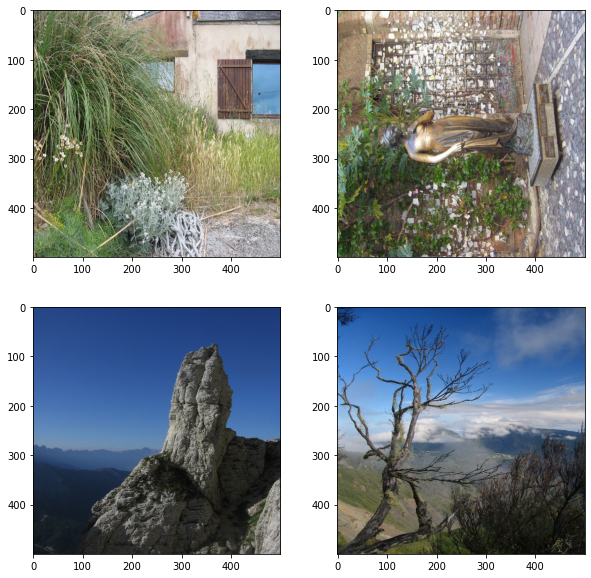

In [ ]:
db_image_path = "Image_Database/"
ts_image_path = "Image_Testset/"

plt.figure(figsize=(10,10)) 

plt.subplot(2,2,1)
plt.imshow(getImg(ts_image_path+"128100.jpg"))
plt.subplot(2,2,2)
plt.imshow(getImg(db_image_path+"121701.jpg"))
plt.subplot(2,2,3)
plt.imshow(getImg(ts_image_path+"127800.jpg"))
plt.subplot(2,2,4)
plt.imshow(getImg(db_image_path+"102701.jpg"))

plt.show()

### **2.7.2 Các trường hợp dự đoán đúng**

In [ ]:
print("[INFO] Correct_imageName")
print("Query\t\tResult")

for i, (key, value) in enumerate(correct_imageName.items()):
  if i > 50 and i  < 60:
    print("{} - {}".format(key, value))

[INFO] Correct_imageName
Query		Result
107600.jpg - 107601.jpg
107800.jpg - 107801.jpg
107900.jpg - 107901.jpg
108100.jpg - 108101.jpg
108500.jpg - 108501.jpg
108700.jpg - 108701.jpg
108800.jpg - 108801.jpg
109200.jpg - 109201.jpg
109300.jpg - 109301.jpg


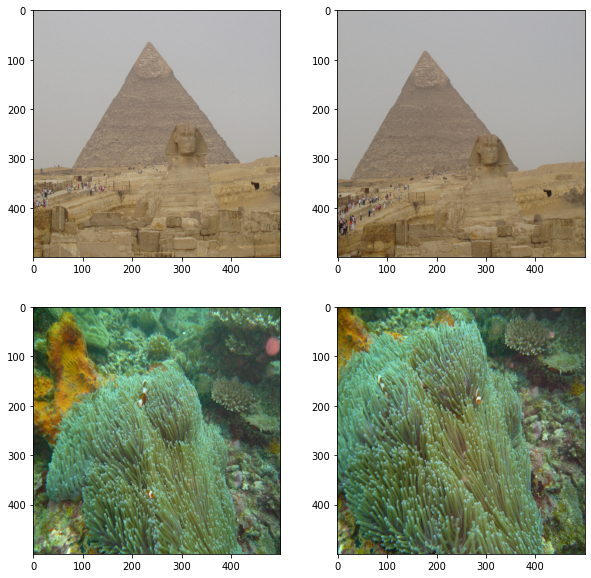

In [ ]:
plt.figure(figsize=(10,10)) 

plt.subplot(2,2,1)
plt.imshow(getImg(ts_image_path+"108100.jpg"))
plt.subplot(2,2,2)
plt.imshow(getImg(db_image_path+"108101.jpg"))
plt.subplot(2,2,3)
plt.imshow(getImg(ts_image_path+"107600.jpg"))
plt.subplot(2,2,4)
plt.imshow(getImg(db_image_path+"107601.jpg"))

plt.show()

# **3. CÀI ĐẶT SONG SONG**

## **3.1 Ý TƯỞNG CHUNG**

Trong phần cài đặt song song, nhóm sẽ tập trung vào các bước xử lý ma trận để song song nhằm cải thiện thời gian tính toán.

Trước tiên, nhóm sẽ khảo sát các thời gian chạy hàm được định nghĩa trong bài toán.

Từ đó xem xét các hàm tốn nhiều thời gian đê tập trung để song song hóa.


| <font size="5"> Task  </font>   | <font size="5"> Time  </font>  |
| ----------- | ----------- |
| <font size="3">                  Calculate Mean  </font>   | <font size="4"> ~3 ms  </font>  |
| <font size="3"> Calculate STD </font>   | <font size="4"> ~8 ms  </font>  |
| <font size="3"> Convolution (SobelX) </font>   | <font size="4" color='red'> **~2 s**  </font>  |
| <font size="3"> histogram_3d </font>   | <font size="4">  ~3 ms  </font>  |
| <font size="3"> Grayscale </font>   | <font size="4">  ~2 ms  </font>  |
| <font size="3"> applyGaussianBlur </font>   | <font size="4">  ~6 ms  </font> |
| <font size="3"> HuMoments </font>   | <font size="4">  ~2 ms  </font> |


<center> (Xét trong trường hợp chạy 1 ảnh kích thước 500x500x3) </center>


Sau khi khảo sát, nhóm đưa ra quyết định sẽ song song các thuật toán:
- **Calculate STD**
- **Calculate Mean**
- **Convolution**

- Ngoài ra, bước **Query** tốn khá nhiều thời gian để thực hiện tính toán similarity distance giữa các features Vector nên nhóm cũng sẽ quyết định song song hóa phần này.

## **3.2 THIẾT KẾ**





### **3.2.1 CÁC BƯỚC TÍNH TOÁN FEATURES VECTOR**


<img align="right" src='https://drive.google.com/uc?id=1fPcQDRi3MdwQ6f4TSAQQWrenHmSkIPeS' width=70%/>



*Nguồn ảnh: https://github.com/Defcon27/Image-Search-using-Parallel-Computing*


| <font size="5"> Task  </font>   | <font size="5"> Before  </font>  |<font size="5"> After  </font>  |
| ----------- | ----------- |----------- |
| <font size="3"> Calculate Mean  </font>   | <font size="4"> ~3 ms  </font>  |<font size="4"> ~1 ms  </font>  |
| <font size="3"> Calculate STD  </font>   | <font size="4"> ~8 ms  </font>  |<font size="4"> ~2 ms  </font>  |
| <font size="3"> Convolution (SobelX)  </font>   | <font size="4"> ~ 2s  </font>  |<font size="4"> ~7 ms  </font>  |

<center> (Xét trong trường hợp chạy 1 ảnh kích thước 500x500x3) </center>

### **3.2.2 TÍNH TOÁN Ở BƯỚC QUERY**


<img align="right" src='https://drive.google.com/uc?id=1Rc_usIb0lp47fJuwkmbLCZU3wOFJi3Ve' width=40%/>


Ý tưởng chính của phần này được thực hiện như sau:
- Ghép các feature vector tạo thành một ma trận các feature
- Song song hóa tính toán trên ma trận để tính distance giữa vector với các vector khác.
- Dùng argsort để trả về giá trị distance nhỏ nhất của list các distance 
- Chiếu giá trị distance trả về để tìm thông tin hình ảnh cần tìm gần với ảnh query nhất

*Nguồn ảnh: https://github.com/Defcon27/Image-Search-using-Parallel-Computing*

## **3.3 KẾT QUẢ** 

In [2]:
!nvidia-smi

Wed Jun 29 03:59:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from ImageSearch_parallel import ParallelImageSearch, getImg

In [4]:
start = time.perf_counter()
true_val, total_val, correct_imageName, incorrect_imageName = ParallelImageSearch("Image_Testset/")
end = time.perf_counter()
print(f"Parallel Time : {end-start}")
seq_time = end-start

Parallel Time : 194.6053351720002


In [5]:
print('[INFO] True_sanple = ', true_val)
print('[INFO] Total_sanple = ', total_val)
print('[INFO] Accuracy = ', true_val/total_val)

[INFO] True_sanple =  198
[INFO] Total_sanple =  300
[INFO] Accuracy =  0.66


## **3.4 XEM XÉT CÁC TRƯỜNG HỢP**

### **3.4.1 Các trường hợp dự đoán sai**

In [6]:
print("[INFO] Incorrect_imageName")
print("Query\t\tResult")
for i, (key, value) in enumerate(incorrect_imageName.items()):
  if i == 5:
    break
  print("{} - {}".format(key, value))

[INFO] Incorrect_imageName
Query		Result
100200.jpg - 112501.jpg
100400.jpg - 100302.jpg
100500.jpg - 126002.jpg
100600.jpg - 123101.jpg
101800.jpg - 106403.jpg


Image_Testset/100200.jpg
Image_Database/112501.jpg
Image_Testset/101800.jpg
Image_Database/106403.jpg


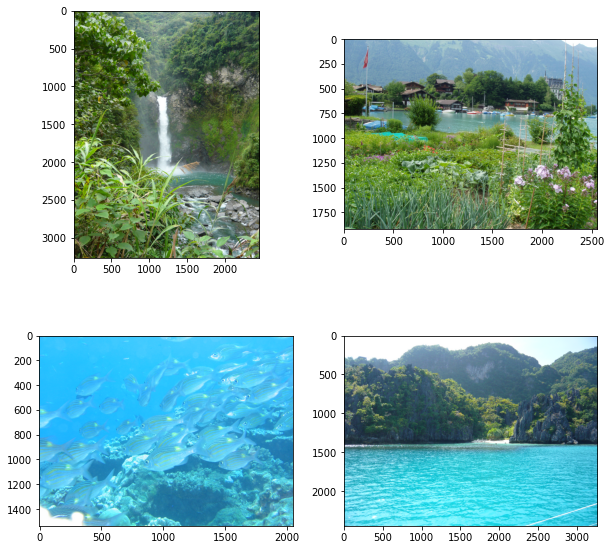

In [7]:
db_image_path = "Image_Database/"
ts_image_path = "Image_Testset/"

plt.figure(figsize=(10,10)) 

plt.subplot(2,2,1)
plt.imshow(getImg(ts_image_path+"100200.jpg"))
plt.subplot(2,2,2)
plt.imshow(getImg(db_image_path+"112501.jpg"))
plt.subplot(2,2,3)
plt.imshow(getImg(ts_image_path+"101800.jpg"))
plt.subplot(2,2,4)
plt.imshow(getImg(db_image_path+"106403.jpg"))

plt.show()

### **3.4.2 Các trường hợp dự đoán đúng**

In [8]:
print("[INFO] Correct_imageName")
print("Query\t\tResult")

for i, (key, value) in enumerate(correct_imageName.items()):
  if i == 5:
    break
  print("{} - {}".format(key, value))

[INFO] Correct_imageName
Query		Result
100000.jpg - 100001.jpg
100300.jpg - 100302.jpg
100100.jpg - 100101.jpg
100700.jpg - 100701.jpg
100900.jpg - 100902.jpg


Image_Testset/100900.jpg
Image_Database/100902.jpg
Image_Testset/100700.jpg
Image_Database/100701.jpg


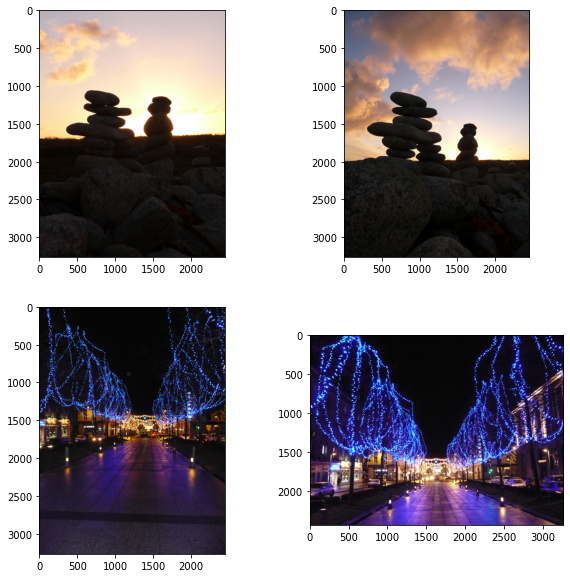

In [9]:
plt.figure(figsize=(10,10)) 

plt.subplot(2,2,1)
plt.imshow(getImg(ts_image_path+"100900.jpg"))
plt.subplot(2,2,2)
plt.imshow(getImg(db_image_path+"100902.jpg"))
plt.subplot(2,2,3)
plt.imshow(getImg(ts_image_path+"100700.jpg"))
plt.subplot(2,2,4)
plt.imshow(getImg(db_image_path+"100701.jpg"))

plt.show()

# **4. TỐI ƯU HÓA**

## **4.1 Ý TƯỞNG CHUNG**

Trong phần này, nhóm tiến hành tối ưu hóa cài đặt song song một số hàm với mục tiêu tăng tốc cho bài toán.

Khảo sát với các hàm đã được song song hóa:
- Calculate STD
- Calculate Mean
- Convolution
- Query

Nhóm đưa ra quyết định tối ưu hóa:
- Convolution


## **4.2 THIẾT KẾ**

Tiến hành load data vào smem để tính toán.

Sau khi tính toán và trả về kết quả.

| <font size="5"> Task  </font>   | <font size="5"> Before  </font>  |<font size="5"> After  </font>  |
| ----------- | ----------- |----------- |
|
| <font size="3"> Convolution (Laplacian)  </font>   | <font size="4"> ~ 7 ms  </font>  |<font size="4"> ~5.5 ms  </font>  |

<center> (Xét trong trường hợp chạy 1 ảnh kích thước 500x500x3) </center>

## **4.3 KẾT QUẢ**

In [5]:
from ImageSearch_cuda_parallel import CUDAParallelImageSearch

In [6]:
start = time.perf_counter()
true_val, total_val, correct_imageName, incorrect_imageName = CUDAParallelImageSearch("Image_Testset/")
end = time.perf_counter()
print(f"CUDA Parallel Time : {end-start}")
seq_time = end-start

CUDA Parallel Time : 163.2731006680001


In [8]:
print('[INFO] True_sanple = ', true_val)
print('[INFO] Total_sanple = ', total_val)
print('[INFO] Accuracy = ', true_val/total_val)

[INFO] True_sanple =  198
[INFO] Total_sanple =  300
[INFO] Accuracy =  0.66


## **4.4 XEM XÉT CÁC TRƯỜNG HỢP**

### **4.4.1 Các trường hợp dự đoán sai**

In [9]:
print("[INFO] Incorrect_imageName")
print("Query\t\tResult")
for i, (key, value) in enumerate(incorrect_imageName.items()):
  if i == 5:
    break
  print("{} - {}".format(key, value))

[INFO] Incorrect_imageName
Query		Result
100200.jpg - 112501.jpg
100400.jpg - 100302.jpg
100500.jpg - 126002.jpg
100600.jpg - 123101.jpg
101800.jpg - 106403.jpg


Image_Testset/100500.jpg
Image_Database/126002.jpg
Image_Testset/100600.jpg
Image_Database/123101.jpg


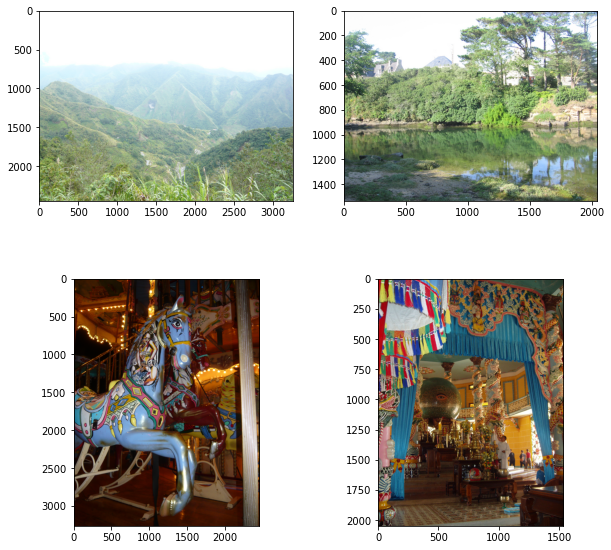

In [10]:
db_image_path = "Image_Database/"
ts_image_path = "Image_Testset/"

plt.figure(figsize=(10,10)) 

plt.subplot(2,2,1)
plt.imshow(getImg(ts_image_path+"100500.jpg"))
plt.subplot(2,2,2)
plt.imshow(getImg(db_image_path+"126002.jpg"))
plt.subplot(2,2,3)
plt.imshow(getImg(ts_image_path+"100600.jpg"))
plt.subplot(2,2,4)
plt.imshow(getImg(db_image_path+"123101.jpg"))

plt.show()

### **4.4.2 Các trường hợp dự đoán đúng**

In [11]:
print("[INFO] Correct_imageName")
print("Query\t\tResult")

for i, (key, value) in enumerate(correct_imageName.items()):
  if i == 5:
    break
  print("{} - {}".format(key, value))

[INFO] Correct_imageName
Query		Result
100000.jpg - 100001.jpg
100300.jpg - 100302.jpg
100100.jpg - 100101.jpg
100700.jpg - 100701.jpg
100900.jpg - 100902.jpg


Image_Testset/100100.jpg
Image_Database/100101.jpg
Image_Testset/100000.jpg
Image_Database/100001.jpg


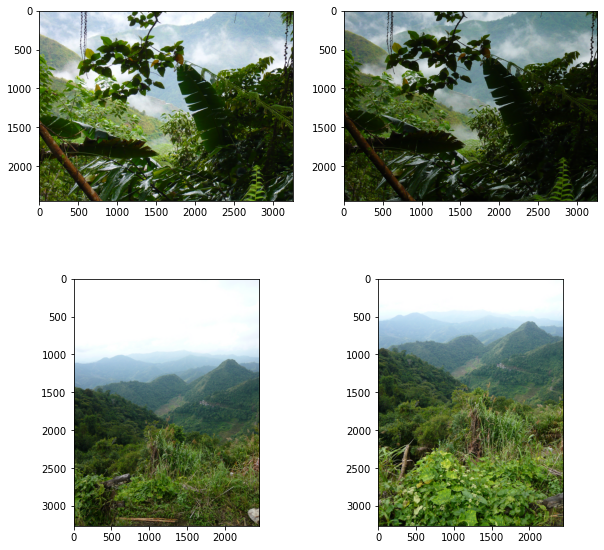

In [12]:
plt.figure(figsize=(10,10)) 

plt.subplot(2,2,1)
plt.imshow(getImg(ts_image_path+"100100.jpg"))
plt.subplot(2,2,2)
plt.imshow(getImg(db_image_path+"100101.jpg"))
plt.subplot(2,2,3)
plt.imshow(getImg(ts_image_path+"100000.jpg"))
plt.subplot(2,2,4)
plt.imshow(getImg(db_image_path+"100001.jpg"))

plt.show()

# **5. TỔNG KẾT**

| <font size="5"> TEST  </font>   |  <font size="5">    </font>   |<font size="5"> Tuần tự  </font>  |<font size="5"> Song song hóa  </font>  |<font size="5"> Tối ưu hóa  </font>  |
| ----------- | ----------- | ----------- |----------- |----------- |
|
| <font size="3"> 01 ảnh  </font>   | <font size="4">  </font>  | <center> <font size="4"> 2000s </font>  | <center> <font size="4"> 75s  </font>  |<center> <font size="4"> no test  </font>  |
| <font size="3"> 812 ảnh  </font>   | <font size="4">  </font> |<center> <font size="4"> > 8h ?  </font>  | <center>  <font size="4"> 280s  </font>  |<center> <font size="4"> no test  </font>  |
| <font size="3"> 300 ảnh  </font>   | <font size="4">  </font>  | <center> <font size="4"> 1950s </font>  |<center> <font size="4"> 190s  </font>  |<center> <font size="4"> 160s  </font>  |

# **6. NHÌN LẠI QUÁ TRÌNH LÀM ĐỒ ÁN**

Qua đồ án này, mỗi thành viên đã học được những kiến thức mới cho riêng mình. Quá trình làm đồ án, nhóm đã gặp nhiều khó khăn. Tuy nhiên các thành viên đã cố gằng cùng nhau để có thể hoàn thành đồ án này. Dưới đây là các thuận lợi, khó khăn mà các thành viên gặp phải và bài học rút ra của mỗi người.

- **VIẾT DŨNG**:
  - *Thuận lợi*:
  - *Khó khăn*:
  - *Kiến thức học được*:
- **MINH THỌ**:
  - *Thuận lợi*:
  - *Khó khăn*:
  - *Kiến thức học được*:
- **ĐÌNH THỤC**:
  - *Thuận lợi*: Đã có hiểu biết trước về các lý thuyết xử lý ảnh (convolution, mean, std, histogram) nên rút ngắn quá trình đọc, hiểu và triển khai đồ án.
  - *Khó khăn*: Quá trình lựa chọn đề tài, tìm hiểu và triển khai Numba còn gặp nhiều khó khăn. 
  - *Kiến thức học được*: Hiểu biết thêm về bài toán truy vấn hình ảnh, học được quy tình từ ý tưởng đến triển khai một bài toán. Nắm được kiến thức về Numba và sử dụng nhằm tăng tốc cho tính toán.

# **7. HƯỚNG PHÁT TRIỂN CHO BÀI TOÁN**

Vì đồ án bị giới hạn về thời gian thực hiện nên kết quả thu được vẫn chưa phải là tối ưu nhất. Để có thể tối ưu về mặt thời gian và độ chính xác, nhóm cần thời gian để nghiên cứu thêm. 

Vì thế, nếu có thể phát triển thêm, nhóm sẽ xem xét và tối ưu nhũng vấn đề sau:
- Xử lý tối ưu hóa bước đã được song song hóa nhưng chưa tối ưu (Query, mean, std)
- Nghiên cứu song song và tối ưu hóa thời gian ở bước tính toán Histogram
- Tìm hiểu thêm về bài toán Image Retirval để thêm các features mới thể hiện đặc trưng ảnh.


# **8. TÀI LIỆU THAM KHẢO**

1.   *https://github.com/Defcon27/Image-Search-using-Parallel-Computing*
2.   *https://www.kaggle.com/datasets/theaayushbajaj/cbir-dataset*
3.   *https://learnopencv.com/shape-matching-using-hu-moments-c-python/*
4.   *https://lear.inrialpes.fr/~jegou/data.php*
5.   *https://numba.discourse.group/*
6.   *https://numba.pydata.org/*





Và nhóm xin gửi lời cảm ơn đặc biệt đến https://stackoverflow.com/ vì đã hỗ trợ nhóm trong quá trình làm đồ án này. ♥♥♥


